In [ ]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3]

# Lecture 4: More NumPy, introducing Matplotlib

In this lecture we will talk more about NumPy and introduce Matplotlib.
- The material covers more parts from the NumPy User Manual [4] 
- as well parts of the Matplotlib User Guide [5].

## Working with NumPy
- Lecture 3 introduced NumPy and the `ndarray` array type
- Now it's time to start working with these!

To access the `numpy` package it is standard to use the import:

In [2]:
import numpy as np

# Element-wise (binary) operations

The first thing to note is that when working with `ndarrays`: Operations are **element-wise**

## Example: Addition

In [3]:
a = np.arange(4.)

b = a + 1

print(f"type(a) = {type(a)}\na = {a}\nb = {b}")

type(a) = <class 'numpy.ndarray'>
a = [0. 1. 2. 3.]
b = [1. 2. 3. 4.]


In [4]:
c = a + b

print('c =', c)

c = [1. 3. 5. 7.]


## Example: Multiplication

In [5]:
a = np.arange(4)
b = np.linspace(1., 2.5, num=4)

c = a * b

print(f" a = {a} \n b = {b} \n c = {c}")

 a = [0 1 2 3] 
 b = [1.  1.5 2.  2.5] 
 c = [0.  1.5 4.  7.5]


**Note:** All the elements in an `ndarray` has a common `dtype`<br>
the results of array operations is promoted to the proper type.

In [6]:
print(a.dtype, b.dtype, c.dtype, sep=', ')

int64, float64, float64


## Shape compatibility

If shapes of operands are incompatible, NumPy will give you an error:

In [7]:
a = np.arange(4)
b = np.linspace(1, 2, num=3)
print(a.shape, b.shape)

(4,) (3,)


In [8]:
c = a * b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

# Broadcasting

# Broadcasting

If the shapes of arrays does not match, NumPy tries to apply **broadcasting** rules

- If one array has a dimension with only a single index, i.e. `len(array.shape) == 1`
- or the first index size is 1
- then the elements in the other dimensions are repeated across

In [9]:
a = np.zeros(shape=(3, 4))
b = np.arange(4.).reshape((1, 4))
print('a =\n', a)
print('b =', b)
print(a.shape, b.shape)

a =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
b = [[0. 1. 2. 3.]]
(3, 4) (1, 4)


In [10]:
c = a + b # What happens here!?!

In [11]:
print(c)

[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]


## Adding one-dimensional axies `np.newaxis`
- To make broadcasting easy it is possible to add extra axies to arrays.
- This is done using slicing and the `np.newaxis` (or `None`)
- Consider the previous example again

In [12]:
a = np.zeros(shape=(3, 4))
b = np.arange(4.)

c = a + b[np.newaxis, :]

print(f'a =\n{a}\nb = {b}\nc =\n{c}')
print(b.shape)
print(b[None, :].shape)

a =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
b = [0. 1. 2. 3.]
c =
[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
(4,)
(1, 4)


If you like to think in index notation the above operation is equivalent to: $ c_{ij} = a_{ij} + b_{j} $

What is `np.newaxis` actually doing?

In [13]:
x = b[np.newaxis, :]
print(b.shape)
print(x.shape)

(4,)
(1, 4)


## More broadcasting

Take the difference $d_{ij}$ of all pairs of entries in two vectors $a_i$ and $b_j$
$$ d_{ij} \equiv a_i - b_j $$

Solve by applying broadcasting to both arrays

In [14]:
a_i = np.arange(4.)
b_j = np.arange(4., 0., -1.)

print(f'a_i = {a_i}\nb_j = {b_j}')

a_i = [0. 1. 2. 3.]
b_j = [4. 3. 2. 1.]


In [15]:
d_ij = a_i[:, np.newaxis] - b_j[np.newaxis, :]
print(d_ij)

[[-4. -3. -2. -1.]
 [-3. -2. -1.  0.]
 [-2. -1.  0.  1.]
 [-1.  0.  1.  2.]]


Or the same using `None` instead of `np.newaxis`

In [ ]:
d_ij = a_i[:, None] - b_j[None, :]
print(d_ij)

# Indexing and slicing

In many algorithms you need to work on parts of an array, i.e. only selected entries will be used.

* When we talk about *indexing* we are choosing data for specific indices out of an array
* For NumPy indexing, you can use Python lists or NumPy arrays as *index arrays*

## Example: Index arrays

In [ ]:
a = np.linspace(1., 10., 7)
index = np.array([0, 2, 3])

print( f"a = {a}" )
print( f"index = {index}" )
print()
print( a[0] )          # Single element
print( a[[0, 2, 3]] )  # Indexing with index array - Python list
print( a[index] )      # Indexing with index array - NumPy array

## Example: Boolean index arrays
* You can also use arrays of Booleans as "mask" arrays to choose specific values

In [ ]:
mask = a > 4
print( f"mask = {mask}" )
print( f"a[mask] = {a[mask]}" )

# Or use condition directly
print( f"a[a<6] = {a[a<6]}" )

## Example: Slicing
* When we talk about *slicing* we are choosing specific data *continuously* or in a *regular pattern*

In [ ]:
print( a[0:2] )        # Slicing: Elements from (and including) no. 0 to no. 2 (not including)
print( a[::2] )        # Slicing: Every second element from start to end
print( a[:0:-1] )      # Slicing: Every element _except_ the first one, in reverse order

## Example: Multidimensional slicing
* NumPy arrays can be of _any_ dimension, indexing follows the same pattern as for one dimension. Different dimensions are separated with a comma (**,**)

In [ ]:
a = np.arange(24).reshape(3, 2, 4)
print( f"a = \n{a}" )
print()
print( "a[0,:,:] = \n{}".format(a[0,:,:]) )    # "block 0"
print()
print( "a[:,1,:] = \n{}".format(a[:,1,:]) )    # "row 1" (from each block)
print()
print( "a[:,:,2] = \n{}".format(a[:,:,2]) )    # "column 2" (from each block)

- For more ways to work with arrays, see the NumPy methods **where()**, **argsort()**, **concatenate()**, **hstack()** and **vstack()**

# Numerics with NumPy

There are **many** numerical routines available in NumPy
* Standard mathematical functions: `np.sin`, `np.cosh`, `np.exp`, `np.log`, `np.log10`, `np.sign`, etc.
* Reductions, `np.max`, `np.min`, `np.sum`, `np.prod`, `np.mean`, `np.median`, etc.
* Cumulative functions: `np.cumsum`, `np.cumprod`
* Integration and differentiation: `np.trapz`, `np.diff`, `np.gradient`
* Contractions, i.e. matrix multiplication and its generalizations: `np.dot`, `np.tensordot`, `np.einsum`, etc.
* Linear algebra `np.linalg`
* Random number generators `np.random`
* Fourier transforms `np.fft`
* Polynomials `np.polynomial`
* And more

see the [NumPy reference manual](https://docs.scipy.org/doc/numpy/reference/) for a complete list

## Sums and Products (`np.sum`, `np.prod`)

In [ ]:
a = 0.1 * np.arange(1., 25.).reshape(2, 3, 4)
print(f"a =\n{a}")

Sum all elements: $\sum_{ijk} a_{ijk}$

In [ ]:
np.sum(a)

Product of all elements: $\prod_{ijk} a_{ijk}$

In [ ]:
np.prod(a)

To work over a subset of axes, use the `axis` key-word argument

Sum all elements over 2nd axis: $\sum_{j} a_{ijk}$

In [ ]:
np.sum(a, axis=1)

Product of all elements over the 2nd and 3rd axis: $\prod_{jk} a_{ijk}$

In [ ]:
 np.prod(a, axis=(1, 2))

## Differentiation `np.diff`

The difference between neighbouring elements
$$y_i = x_{i+1} - x_i$$

can be computed by: `y = np.diff(x, n=1, axis=-1)`
- `n :`  number of times to take the difference
- `axis :` axis to work on, default `-1`


In [ ]:
x = np.arange(5.)
print(x)

In [ ]:
y = np.diff(x)
print(y)

In [ ]:
z = np.diff(x, 2)
print(z)

## Gradients `np.gradient`
Approximate the gradient calculation
$$\frac{df(x_n)}{dx} \approx \frac{f(x_{n+1})- 2f(x_n) + f(x_{n-1})}{2\Delta x}$$
use `np.gradient(f , [dx, dy, ....])`

Example:
$$f(x) = \cos(x) \quad \Rightarrow \quad f'(x) \equiv \frac{d}{dx}f(x) = \frac{d}{dx} \cos(x) = -\sin(x)$$

In [ ]:
dx = 0.1
x = np.arange(0, 3*np.pi, dx) 

f = np.cos(x)
f_prime = np.gradient(f, dx)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, f, label='$f(x)$')
plt.plot(x, f_prime, label='$f\'(x)$')
plt.xlabel('$x$')
plt.legend();

## Cumulative sums (integration) `np.cumsum`

For the Riemann sum approximation of an integral 
$$F(x) = \int_{x_0}^x f(y) \, dy 
\quad \Rightarrow \quad F(x_n) \approx \Delta x \cdot \sum_{i = 0}^n f(x_i)$$

* use `np.cumsum(f, axis=None, out=None)`
* `axis` is the axis to work along (default is to *flatten* array and use all elements)

* Example: $f(x) = \cos(x) \Rightarrow F(x) = \sin(x)$

In [ ]:
x = np.linspace(0, 4*np.pi, num=400)
dx = x[1] - x[0] # All distances equal
  
f = np.cos(x)  
F = np.cumsum(f) * dx

plt.plot(x, f, label='$f(x)$')
plt.plot(x, F, label='$F(x)$')
plt.xlabel('$x$')
plt.legend();

For integration over an entire interval
$$ \int_{x_0}^{x_{-1}} f(x) \, dx $$
* use `numpy.trapz(f, x=None, dx=1.0, axis=-1)` (trapetzoidal rule)
* You must give `x` **or** `dx`!

In [ ]:
F_trapz = np.trapz(f, x=x)

print("Trapezoidal integration:", F_trapz)
print("Rieman integration:     ", F[-1])

## Array dot-product  `np.dot`

- The standard binary operations, `+`, `-`, `*`, `/` etc., work *element-wise* on NumPy `ndarray`s
- For Vector/matrix multiplications use `np.dot(a, b)`
- Note: `ndarrays` have `.dot` *method*, see below

The dot product `np.dot` is defined as
* For vectors: $a \cdot b = \sum_j a_j b_j$ (the result is a scalar)
* For matrices: $A \cdot B = \sum_k A_{ik} B_{kj}$

In [ ]:
a = np.array([1., 2., 3.])
b = np.array([2., 1., 0.])

In [ ]:
np.dot(a, b)

In [ ]:
a.dot(b)

In [ ]:
a * b

## Matrix vector product

`np.dot` does matrix-vector multiplication when given one 2D and one 1D array

In [ ]:
A = np.arange(6.).reshape( (3,2) )
b = np.arange(2.)
print( "A =\n{}".format(A) )
print( "b = {}".format(b) )

In [ ]:
A.dot(b)

## Matrix multiplication
`np.dot` does matrix multiplication when given two 2D arrays

In [ ]:
A = np.arange(9).reshape((3,3))
B = np.random.randint(0,10,(3,3))
print("A =", A, 'B =', B, sep='\n')

In [ ]:
A.dot(B)

## Array manipulation

* Transpose given by the `T` view, e.g. `B.T`
* Array conjugate using the `.conjugate` or `.conj` methods
* General transpose-like operations, `np.swapaxes` etc.<br>
  see [NumPy Array Manipulation Routines](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)


In [ ]:
B = np.arange(6).reshape(2, 3)
B

In [ ]:
B.T

In [ ]:
np.swapaxes(B, 0, 1)

Complex valued arrays and complex conjugate

In [ ]:
C = (1 + 1j) * B
C

In [ ]:
C.conj()

## NumPy Linear Algebra module `np.linalg`
Provides additional operations
* `norm(A)`: matrix or vector norm (default: 2-norm)
* `det(A)`: matrix determinant
* `x = solve(A, b)`: linear equation system solver: $A \cdot \mathbf{x} = \mathbf{b}$
* `inv(A)`, `pinv(A)`: matrix inverse and pseudo inverse
* `Q, R = qr(A)` QR-factorization
* `eig(A)`: matrix eigen value and eigen vector decomposition
* `svd(A)`: matrix single-value decomposition

Example: inverse

In [ ]:
A = np.array([
    [1, 0, 1],
    [3, 1, 0],
    [1, 2, 1]])

A_inv = np.linalg.inv(A)
print(A_inv)

In [ ]:
A.dot(A_inv)

For more information use the built-in help!

## The matrix type `np.matrix`
- It is **deprecated**, please do not use it!
- Instead use the new matrix multiplication syntax: `A @ B` on `ndarray`:s

Here are the previous examples with `np.dot` replaced by `@`

In [ ]:
A = np.arange(6.).reshape((3, 2))
b = np.arange(2.)
A @ b

In [ ]:
A = np.arange(9).reshape((3 ,3))
B = np.random.randint(0, 10, size=(3, 3))
A @ B

In [ ]:
A = np.array([
    [1, 0, 1],
    [3, 1, 0],
    [1, 2, 1]])

A_inv = np.linalg.inv(A)
A @ A_inv

## More NumPy!



There are many additional sub-packages and functions in NumPy not covered here, for example the modules 
- `np.fft`,
- `np.random`, and 
- `np.polynomial`, 

for more information use the built-in `help()` and the online documentation.

# Visualisation

Visualization is a cornerstone of scientific computing

There are many tools for data visualisation, e.g.
- Matlab, Mathematica, GNUplot, R, etc., and
- many more specialised software suites

For Python the dominating package is:
- **Matplotlib**, for 2D plots with some 3D support
- there are interesting competitors, [**plotly**](https://plotly.com/python/), [**Bokeh**](https://bokeh.org/), etc.

Here we will only look into Matplotlib.

# Matplotlib

Matlplotlib is a Python 2D plotting library which produces publication quality figures

Matplotlib can be used in 
  - Python scripts, 
  - the Python and IPython shell, 
  - the Jupyter notebook, 
  - web application servers, and
  - four graphical user interface toolkits.

## Matplotlib motto:

*Matplotlib tries to make easy things easy and hard things possible.*

You can generate 
  - plots, 
  - histograms, 
  - power spectra, 
  - bar charts, 
  - errorcharts, 
  - scatterplots, etc., 
  
with just a few lines of code. 

- For simple plotting the pyplot module provides a MATLAB-like interface, 
- For the power user, you have full control of line styles, font properties, axes properties, etc., 
  - via an object oriented interface or 
  - via a set of functions familiar to MATLAB users

For a sampling, see the screenshots, [thumbnail gallery](https://matplotlib.org/gallery/index.html), and examples directory.

## `matplotlib.pyplot`

- `matplotlib.pyplot` is the "main" module for plotting
- this module contain all the things you need to create figures, draw axes, plot results etc.
- it is standard to import Matplotlib according to:

In [ ]:
import matplotlib.pyplot as plt

## Figures, axes and plots

To understand how to work with Matplotlib we need to know how Matplotlib constructs its figures.
- The "basic" object for all figures is the `figure` object.
- The figure object contains all the axes, plots and axis lables, etc. that you create

- The figure object can be explicitly created using `plt.figure()`, 
- However, it is created automatically when using most plotting-commands.


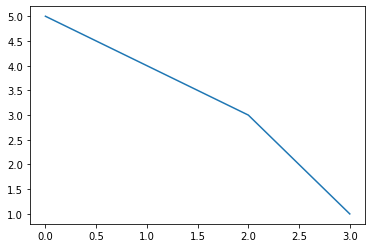

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0, 2, 3], [5, 3, 1]);
plt.show()

The call to `plt.plot(...)` creates a line plot (it also automatically creates an axes object and makes it the current axis).

## What makes a figure?

A figure comprise a number of components
- **axes**, with 
  - title
  - legend
  - spines
  - axis labels
  - grid
  - minor and major ticks, and
  - tick labes
- different types of **plots**
  - line plots
  - scatter plots
  - etc.

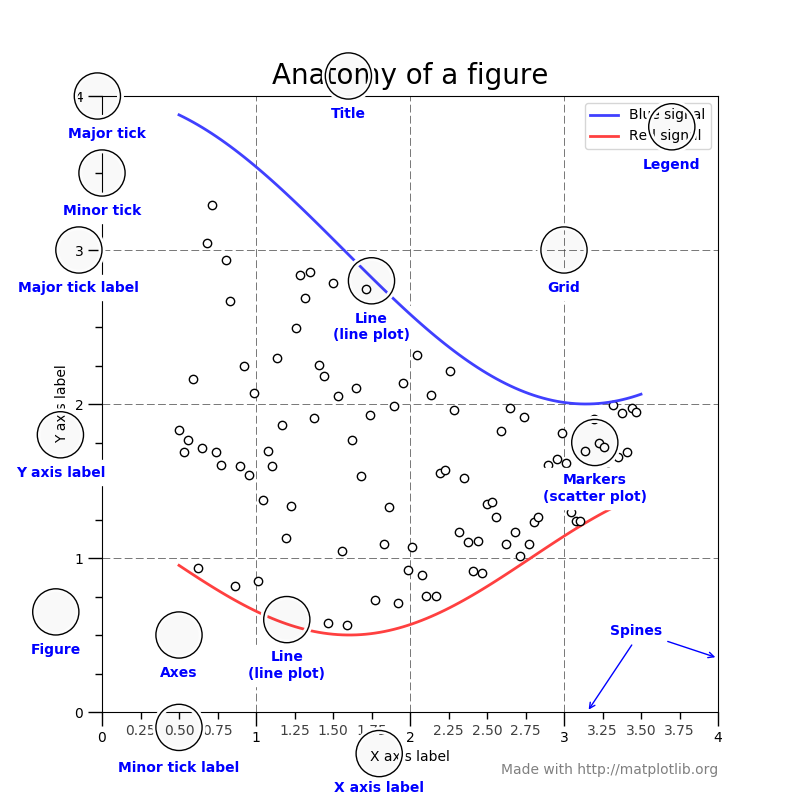

(Source: [the Matplotlib homepage](https://matplotlib.org/stable/tutorials/introductory/usage.html#parts-of-a-figure))


## Controlling the axes

Methods for the figure object, or for individual axes objects include:

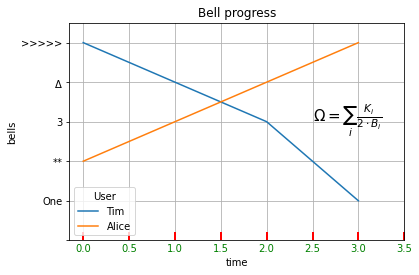

In [18]:
plt.figure()
plt.title('Bell progress')
plt.plot([0,2,3], [5,3,1], label='Tim')
plt.plot([0,1,3], [2,3,5], label='Alice')
plt.legend(title='User', loc='best')

plt.xlabel('time')
plt.ylabel('bells')
plt.xlim(right=3.5)
plt.ylim([0., 5.5])
plt.grid(True)

plt.text( 2.5, 3., r'$\Omega = \sum_i \frac{K_i}{2 \cdot B_i}$', size=15 )
plt.yticks(np.arange(6), ['', 'One', '**', 3, r'$\Delta$', '>>>>>'])
plt.tick_params(axis='x', direction='in',  color='r', labelcolor='g', 
                width=2, length=8, top=False)
plt.savefig('my_plot.svg')
plt.show()

- There are many more  possibilities available to modify your plots
- See the online material and the ["gallery" section on the the Matplotlib homepage](https://matplotlib.org/stable/gallery/index.html) for more information.
- **Note:** For text labels, you can use raw strings (`r"..."`) with LaTeX-syntax to display symbols etc. (See the simple example above.)

## Multiple axes

You can combine plots with completely different scales in one direction into one plot (or subplot) 
by using `plt.twinx()` or `plt.twiny()`.

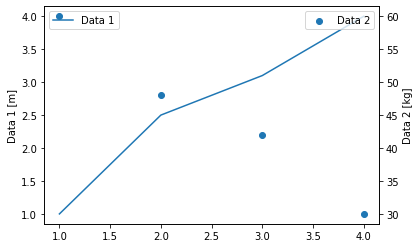

In [19]:
plt.figure()
plt.plot([1, 2, 3, 4], [1, 2.5, 3.1, 4], label='Data 1')
plt.ylabel('Data 1 [m]')
plt.legend()

plt.twinx()

plt.scatter( [1, 2, 3, 4], [60, 48, 42, 30], label='Data 2' )
plt.ylabel('Data 2 [kg]')
plt.legend()

plt.xlabel('X')
plt.show()

# Plot styling

## Plot styling: Colors

Colors, markers and linestyles can be specified using a Matlab-like notation for simple cases
- `"r*-"` to give a red line with `*`-markers at the points.
- To separately control color use the `color=` keyword-argument

There are four color specification method to choose from:
- By name (or the single letter version like above). All the 140 color names from the [HTML/CSS specification](https://www.w3schools.com/colors/colors_names.asp) are supported.
- Using a [RGB hex string (as in HTML/CSS)](https://www.w3schools.com/colors/colors_hex.asp), e.g. `#0000FF` for blue etc.
- By an RGB(A) tuple of floats `(r, g, b, alpha)` with values in $a,b,c,\alpha \in [0, 1]$. The last parameter $\alpha$ is optional and controls the transparency.<br> e.g. red is (1.0, 0.0, 0.0), while (0.0, 0.0, 1.0, 0.5) gives transparent blue. 
- Setting gray level with a string containing a number between 0 and 1. For black use `"0.0"` and for white `"1.0"`

(Note: Transparency can also be set by the `alpha=` key-word argument)

In [ ]:
plt.plot([0, 1, 2], [1.2, 1.5, 1.0], color='OliveDrab')
plt.plot([0, 1, 2], [0.8, 0.4, 0.2], color=(0.2, 0.8, 0.8, 0.5))
plt.plot([0, 1, 2], [0.5, 0.8, 1.3], color="0.6", alpha=0.5, linewidth=5)
plt.show()

## Plot styling: Line styles

- `-` : solid lines
- `--` : dashed lines
- `-.` : dot-dashed lines
- `dashes=[dash_length, space_length, ...]` : arbitrary dashes

In [ ]:
x = np.linspace(0, 1, num=10)
a, b, c, d = np.cumsum(np.random.random((4, len(x))), axis=-1)
plt.plot(x, a, '-', label='a')
plt.plot(x, b, '--', label='b')
plt.plot(x, c, '-.', label='c')
plt.plot(x, d, dashes=[6, 1, 1, 1, 1, 1], label='d')
plt.legend(loc='best'); plt.show()

## Plot styling: Markers

Markers are set in the `fmt` argument or the `marker=` keyword argument.

marker     |  description  ||marker    |  description    ||marker  |  description  ||marker    |  description  
:----------|:--------------||:---------|:----------------||:-------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus           ||","     |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond        ||"d"     |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square         ||"p"     |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft      ||"<"     | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright     ||">"     | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup        ||"^"     | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown      ||"v"     | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing        ||" "     |  nothing      ||""        |  nothing

It is also possible to construct new markers by giving a list of xy-coordinate tuples (relative to the center of the marker at `(0,0)`).

In [ ]:
plt.plot([0, 1, 2], [1.2, 1.5, 1.0], 'kD-', markersize=10 )
plt.plot([0, 1, 2], [0.5, 0.8, 1.3], color="green", marker="8", markersize=15 )
plt.plot([0, 1, 2], [0.8, 0.4, 0.2], color='SlateBlue', alpha=0.75,
         marker=[(-3, -5), (0, 3), (3, -5), (0, -3)], markersize=25)
plt.show()

## Plot functions

There is a wide range of plot functions available in Matplotlib.
- We have already used `plt.plot` and `plt.scatter`
- Lets look at a fev more ([more plot types](https://matplotlib.org/stable/plot_types/index.html))

## `plt.plot`

The `plt.plot()` is very flexible
- `plt.plot(x, y)` will plot the values in `x` and `y`. `x`, `y` can be single values or iterable items (list, tuples, NumPy arrays etc.) of coordinates
* `plot(x1, y1, x2, y2, ...)` will plot the sets of `x` and `y`:s at once in the same figure
* `plot(y)` will plot *y* with *x* as integers starting from 0

Common keyword arguments to `plt.plot` are
- `color=`, `alpha=`, 
- `linestyle=`, `linewidth=`, `fillstyle=`,
- `marker=`, `markersize=`, 
- `label=` (will be shown by `plt.legend`)

Note: It is still possible to use Matlab-like colour/marker/linestyle specifications like `"rx-."`

Another example:

[[0.05 0.05]
 [0.4  0.3 ]
 [0.6  0.5 ]
 [0.7  0.55]
 [0.95 0.61]]


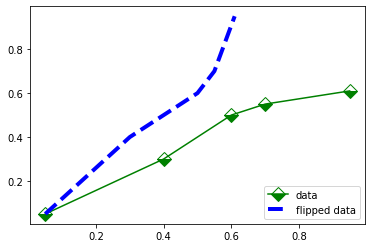

In [20]:
coord = np.array( [[0.05, 0.05], [0.4, 0.3], [0.6, 0.5], [0.7, 0.55], [0.95, 0.61]] )
print(coord)
plt.plot(coord[:, 0], coord[:, 1], color='g', label='data', fillstyle='bottom', marker='D', markersize=10 )
plt.plot(coord[:, 1], coord[:, 0], color='b', label='flipped data', linestyle='--', linewidth=4 )
plt.legend(loc='lower right')
plt.show()

Multi-dimensional `y` array example

(10,) (10, 4)


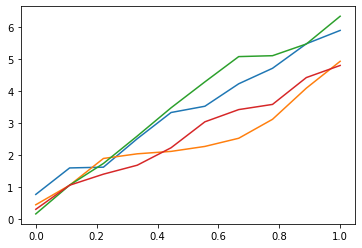

In [21]:
x = np.linspace(0, 1, num=10)
y = np.cumsum(np.random.random((len(x), 4)), axis=0)
print(x.shape, y.shape)
plt.plot(x, y)
plt.show()

## Logarithmic plots: `plt.semilogx`, `plt.semilogy`, `plt.loglog`

Any axis can be scaled logarithmically by using
- `plt.semilogx` : scale the x-axis logaritmically
- `plt.semilogy` : the y-axis
- `plt.loglog` : scale both axes

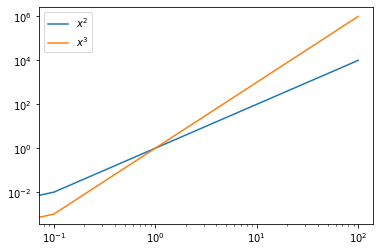

In [22]:
x = np.linspace(0, 100, num=1000)
plt.loglog(x, x**2, label=r'$x^2$')
plt.loglog(x, x**3, label=r'$x^3$')
plt.legend(loc='upper left'); plt.show()

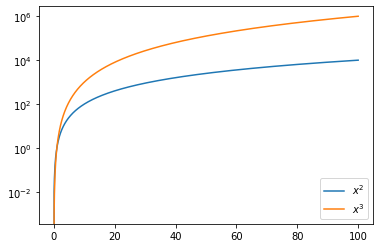

In [23]:
plt.semilogy(x, x**2, label=r'$x^2$')
plt.semilogy(x, x**3, label=r'$x^3$')
plt.legend(loc='lower right'); plt.show()

## Error bars: `plt.errorbar`

For errorbars (or any other interval you want to show like an errorbar), use 
- `plt.errorbar(x, y, xerr=..., yerr=...)`

In [24]:
x = np.linspace(0, 1, num=10)
y = x*(x-1)*(x+1)
xerror = np.random.normal(size=len(x), scale=0.1)
yerr = np.random.normal(size=len(x), scale=0.05)

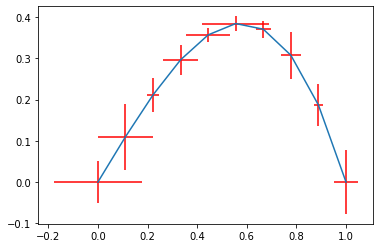

In [25]:
plt.errorbar(x, -y, xerr=xerror, yerr=yerr, ecolor='r');

In [ ]:
plt.errorbar(x, y, xerr=yerr, ecolor='g');

## Filled plots `plt.fill_between`

- You can create plots with filled areas between lines
- or between a line and the x-axis) using `plt.fill_between(x, y1, y2=)`

In [ ]:
x = np.linspace(1e-10, 4*np.pi, num=1000)
y1 = np.sin(x + np.pi*0.5)
y2 = np.sin(x) / x

plt.fill_between(x, y1, y2=y2, edgecolor='Purple', alpha=0.5, linewidth=4);

In [ ]:
plt.fill_between(x, y2, edgecolor='r', facecolor='SeaGreen', alpha=0.75);

## Histograms `plt.hist`

- Create histograms using `plt.hist(y, bins=10, normed=False, histtype= ...)`
- See the built-in help or online documentation for more options

In [ ]:
x = 100 + 15 * np.random.randn(100000)
plt.hist(x, bins=40, density=True, facecolor='g', alpha=0.75);

In [ ]:
plt.hist(x, bins=20, histtype='stepfilled', facecolor='PowderBlue', alpha=0.5);

## Contour plots `plt.contour`, `plt.contourf`

You can create filled and non-filled contour plots using `plt.contourf` and `plt.contour` respectively.
- To specify colour-map, use the `cmap=` keyword argument
- For predefined color maps see [the Matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

In [ ]:
x = np.linspace(-4*np.pi, 4*np.pi)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) / R

plt.contour(X, Y, Z, 15, cmap=plt.cm.RdBu)
plt.axis('image');

In [ ]:
plt.contourf(X, Y, Z, 15, cmap=plt.cm.summer); plt.axis('image');

# Axes and subplots `plt.axis`, `plt.subplot`

- In the previous examples we have not explicitly worked with the `axis` object in Matplotlib
- For a single plot the axis is generated automatically when plotting data, using e.g. `plt.plot`
- Working with more than one set of axes in a single figure sometimes requires explicit axes

In [ ]:
x = np.linspace(-1, 1, num=10)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, x**2)
ax.set_xlabel('x');

- All functionality is reachable using methods of the `figure` and `axis` objects
- This is the *object oriented* way of using Matplotlib

## Multiple subplots `plt.subplot`

* `ax = plt.subplot(nrows, ncols, plot_number)` : call for all values of `plot_number`
* `fig1, (ax1, ax2, ...) = plt.subplots(nrows, ncols)` : call once

Both these gives a `nrows x ncols` grid of subplots.

In [ ]:
plt.subplot(1, 2, 1)
plt.plot([0,2,3], [5,3,1])
plt.subplot(1, 2, 2)
plt.plot([0,1,3], [2,4,3])
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([0,2,3], [5,3,1])
ax2.plot([0,1,3], [2,4,3])
plt.show()

## Subplot layouts

How do we make a figure with 
- **one** subplot on the left and 
- **two** subplots on top of each other to the right?

Solution: 
1. "Pretend" to have a $1 \times 2$ layout for the first subplot, and chose position 1 (the leftmost for it).
2. For the two right plots, "pretend" to have a $2 \times 2$ layout and chose positions 2 and 4 (the numbering goes from left to right from the top down).

In [ ]:
x, y_L, y_R = [0,2,3], [5,3,1], [2,4,3]

plt.subplot(1, 2, 1)
plt.plot(x, y_L)
plt.subplot(2, 2, 2)
plt.plot(x, y_R)
plt.subplot(2, 2, 4)
plt.plot(x, y_R)

plt.tight_layout()

Tip: For more advanced subplot layouts use [the `GridSpec` class](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec)

# 3D plotting

- To contruct 3D-plots with Matplotlib, you additional need to import an extra axes object
  ```python
  from mpl_toolkits.mplot3d import Axes3D
  ```
- setting the `projection='3d'` keyword argument when creating axes gives a 3D plot

In [ ]:
%config InlineBackend.figure_formats = ['retina']

In [ ]:
theta = np.linspace(-4, 4, num=100)
z = 0.5*theta; r = z**2 + 1
x = r * np.sin(np.pi*theta)
y = r * np.cos(np.pi*theta)

from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(12, 12))
plt.subplot(1,1,1, projection='3d')
plt.plot(x, y, z, label='parametric curve')
plt.legend()
plt.show()

In [ ]:
x = np.linspace(-4*np.pi, 4*np.pi, num=40)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) / R

plt.figure(figsize=(12, 12))
ax = plt.subplot(1,1,1, projection='3d')
ax.plot_wireframe(X, Y, Z, alpha=0.5)
plt.show()

In [ ]:
x = np.linspace(-4*np.pi, 4*np.pi, num=100)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) / R

plt.figure(figsize=(12, 12))
ax = plt.subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow, rstride=1, cstride=1, alpha=.5, linewidth=0)
ax.contour(X, Y, Z, zdir='y', offset=15)
ax.contour(X, Y, Z, zdir='x', offset=-15)
plt.show()

## Matplotlib collections

If you want to plot a large number of elements it is somewhat inefficient to plot them one by one using the methods shown above.

To remedy this Matplotlib have a **collections** submodule that helps in collecting many objects of the same type that can be used efficiently when drawing images.

There are collection-types for polygons, lines, triangular meshes, paths and more.

For example the **matplotlib.collections** **LineCollection(segments, ...)** gathers segments of lines for convinient plotting of many line-segments.
* **segments** is a sequence of (line0, line1, line2), where:
* **lineX** is a sequence of coordinates, i.e. lineX = (x0, y0), (x1, y1), ... (xm, ym)

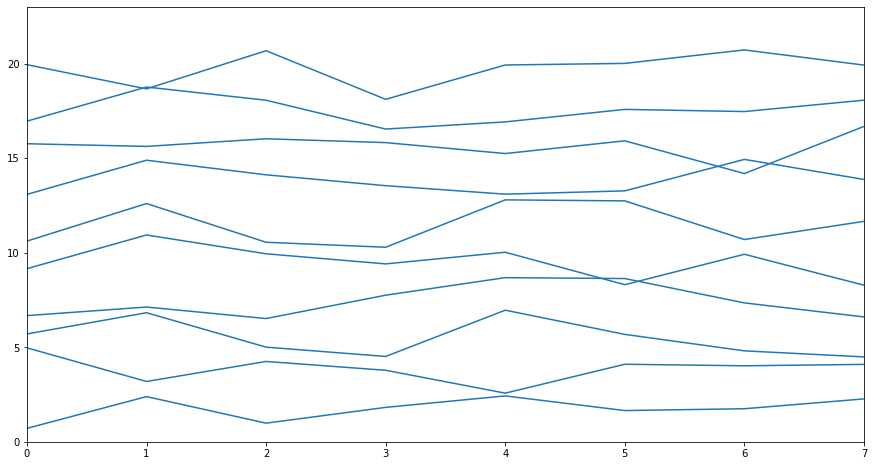

In [26]:
Ny = 10
x = np.arange(8)

# Ny no. of lines where y is randoms between 0 and 2 * Ny + 3
from random import random
lines = []
for i in np.arange(Ny):
    line = []
    for xj in x:
        y = random() * 3 + 2 * i
        line.append( (xj, y) )
        #print(line)
    lines.append(line)
    
from matplotlib.collections import LineCollection
line_segments = LineCollection(lines)

fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
ax.add_collection(line_segments)
ax.set_ylim((0, 2*Ny+3))
ax.set_xlim((0, np.amax(x)))
plt.show()

## More Matplotlib?

Have a look at the [thumbnail gallery](https://matplotlib.org/stable/gallery/index.html) and see if you **see** what you want to do.